In [62]:
from math import exp

import numpy as np
from matplotlib import pyplot as plt

from lab2.conjugate_gradient import conjugate_gradient
from lab2.derivative import derivative
from lab2.newton import newton
from lab2.gradient_descent import grad_descent
from lab2.profiler import Profiler

In [63]:
E = exp(1)


def test_function1(x1, x2):
    return 100 * (x2 - x1) ** 2 + (1 - x1) ** 2


def rosenbrock(x1, x2):
    return 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2


def test_function2(x, y):
    return -(2 * E ** (-((x - 1) / 2) ** 2 - ((y - 1)) ** 2)
             + 3 * E ** (-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2))

In [64]:
def execute_with_profiler(solver):
    profiler = Profiler()
    result = solver()

    return profiler.capture(), result


def show_plot(x_label, y_label, x, methods_evaluation, title, x_ticks_labels=None):
    plt.figure()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    for method in methods_evaluation.keys():
        plt.plot(x, methods_evaluation[method], label=method)
    plt.legend()
    plt.show()


def check_value_boom(cur, prev):
    mean = np.array(prev).mean()
    return len(prev) > 0 and 1.3 * mean < cur

In [65]:
initial_points = [
    np.array([1., 2.]),
    np.array([1., 0.]),
    np.array([-2., 2.]),
    np.array([2., 3.]),
    np.array([-0.1, 0.5])
]

functions = [["f1", test_function1], ["rosenbrock", rosenbrock], ["f2", test_function2]]
solvers = [
         ["conjugate gradient", conjugate_gradient],
         ["newton", newton],
         ["gradient descent", grad_descent]
     ]

In [66]:
execution_time = dict()
iterations = dict()
optimal_points = dict()

for [solver_name, _] in solvers:
    execution_time[solver_name] = []
    iterations[solver_name] = []

samples = len(functions) * len(initial_points)
for [function_name, function] in functions:
    for initial_point in initial_points:
        for [solver_name, solver] in solvers:
            print("### Solver %s, function %s, initial point %s" % (solver_name, function_name, initial_point))
            time, points = execute_with_profiler(lambda: solver(function, initial_point))

            time /= len(points)

            optimal_point = points[-1]
            function_value = function(*optimal_point)
            if function_name not in optimal_points or function(*optimal_points[function_name][0]) > function_value:
                optimal_points[function_name] = (optimal_point, solver_name)
            print("--- Result point %s, function value at the point %f" % (points[-1], function_value))
            if check_value_boom(time, execution_time[solver_name]):
                print(
                    "!!! Solver %s, function %s, initial point %s: time execution on this sample increased significantly – %f"
                    % (solver_name, function_name, initial_point, time)
                )
            if check_value_boom(len(points), iterations[solver_name]):
                print(
                    "!!! Solver %s, function %s, initial point %s: iterations number on this sample increased significantly – %f"
                    % (solver_name, function_name, initial_point, len(points))
                )
            execution_time[solver_name].append(time)
            iterations[solver_name].append(len(points))

### Solver conjugate gradient, function f1, initial point [1. 2.]
Update is too small: 9.55276255558403e-12
--- Result point [1.00000002 1.        ], function value at the point 0.000000
### Solver newton, function f1, initial point [1. 2.]
Gradient faded
--- Result point [1. 1.], function value at the point 0.000000
### Solver gradient descent, function f1, initial point [1. 2.]
Update is too small: 9.57212757419315e-12
--- Result point [1.         1.00000002], function value at the point 0.000000
### Solver conjugate gradient, function f1, initial point [1. 0.]
Update is too small: 9.55176325963541e-12
--- Result point [0.99999998 1.        ], function value at the point 0.000000
### Solver newton, function f1, initial point [1. 0.]
Gradient faded
--- Result point [1. 1.], function value at the point 0.000000
### Solver gradient descent, function f1, initial point [1. 0.]
Update is too small: 9.620692664823946e-12
--- Result point [1. 1.], function value at the point 0.000000
### Sol

<ipython-input-64-6f2d82cd7382>:21: RuntimeWarning: Mean of empty slice.
  mean = np.array(prev).mean()
/Users/anton.shelepov/PycharmProjects/optimization-theory/venv/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


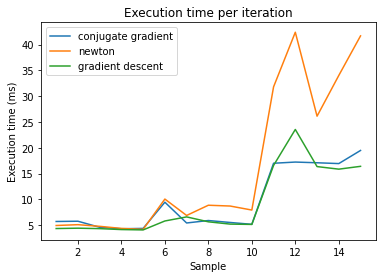

In [67]:
show_plot("Sample", "Execution time (ms)", range(1, samples + 1), execution_time,
          "Execution time per iteration")

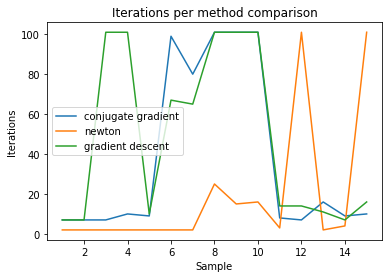

In [68]:
show_plot("Sample", "Iterations", range(1, samples + 1), iterations, "Iterations per method comparison")

In [69]:
for [function_name, function] in functions:
    best_point, best_solver = optimal_points[function_name]
    function_result = function(*best_point)

    print("Optimization result for " + function_name + ": " + str(function_result)
          + " at point " + str(best_point) + ". Optimised by " + best_solver)

Optimization result for f1: 1.9918737856830548e-29 at point [1. 1.]. Optimised by newton
Optimization result for rosenbrock: 0.0 at point [1. 1.]. Optimised by newton
Optimization result for f2: -3.169317216225082 at point [1.26303504 1.33439596]. Optimised by conjugate gradient


Update is too small: 3.597477871153387e-11
Update is too small: 2.398081733190338e-14


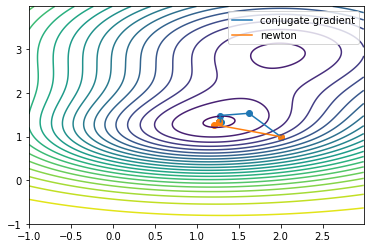

In [70]:
initial_point = np.array([2., 1.])
f = test_function2

xmin, xmax = -1, 3
ymin, ymax = -1, 4

x = np.arange(xmin, xmax, 0.01)
y = np.arange(ymin, ymax, 0.01)
x, y = np.meshgrid(x, y)
z = f(x, y)
plt.contour(x, y, z, 20)

solvers = [
         ["conjugate gradient", conjugate_gradient],
         ["newton", newton],
     ]
for (solver_name, solver) in solvers:
    points = solver(f, initial_point)
    plt.plot(points[:, 0], points[:, 1], label=solver_name)
    plt.scatter(points[:, 0], points[:, 1])

plt.legend()
plt.show()
